# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
!pip install palmerpenguins plotnine
import numpy as np
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
np.random.seed(42)
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Dummify categorical variables (e.g. species, island, sex). Numeric predictors (e.g. bill_length_mm, flipper_length_mm, body_mass_g) do not need dummifying

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

RMSE (deg 1):  1.917
RMSE (deg 2):  1.857
RMSE (deg 3):  1.826
RMSE (deg 10): 1.679


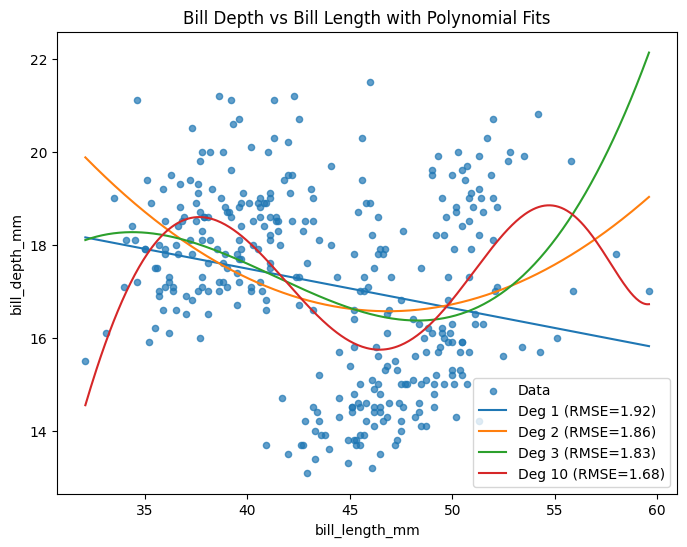

In [ ]:
df = penguins[['bill_length_mm', 'bill_depth_mm']].dropna().copy()
y = df['bill_depth_mm'].to_numpy()
x = df['bill_length_mm'].to_numpy().reshape(-1, 1)
X1  = np.c_[x]
X2  = np.c_[x, x**2]
X3  = np.c_[x, x**2, x**3]
X10 = np.concatenate([x**d for d in range(1, 11)], axis=1)
m1  = LinearRegression().fit(X1, y)
m2  = LinearRegression().fit(X2, y)
m3  = LinearRegression().fit(X3, y)
m10 = LinearRegression().fit(X10, y)
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse1  = rmse(y, m1.predict(X1))
rmse2  = rmse(y, m2.predict(X2))
rmse3  = rmse(y, m3.predict(X3))
rmse10 = rmse(y, m10.predict(X10))
print(f"RMSE (deg 1):  {rmse1:.3f}")
print(f"RMSE (deg 2):  {rmse2:.3f}")
print(f"RMSE (deg 3):  {rmse3:.3f}")
print(f"RMSE (deg 10): {rmse10:.3f}")
x_grid = np.linspace(x.min(), x.max(), 400).reshape(-1, 1)
grid1  = np.c_[x_grid]
grid2  = np.c_[x_grid, x_grid**2]
grid3  = np.c_[x_grid, x_grid**2, x_grid**3]
grid10 = np.concatenate([x_grid**d for d in range(1, 11)], axis=1)
yhat1  = m1.predict(grid1)
yhat2  = m2.predict(grid2)
yhat3  = m3.predict(grid3)
yhat10 = m10.predict(grid10)
plt.scatter(x, y, s=20, alpha=0.7, label='Data')
plt.plot(x_grid, yhat1,  label=f'Deg 1 (RMSE={rmse1:.2f})')
plt.plot(x_grid, yhat2,  label=f'Deg 2 (RMSE={rmse2:.2f})')
plt.plot(x_grid, yhat3,  label=f'Deg 3 (RMSE={rmse3:.2f})')
plt.plot(x_grid, yhat10, label=f'Deg 10 (RMSE={rmse10:.2f})')
plt.title('Bill Depth vs Bill Length with Polynomial Fits')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.legend()
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

- Yes, the degree-1 (linear) model underfits. It forces a straight line through a relationship that shows clear curvature, leaving systematic structure in the residuals. That’s why its RMSE is highest among the four fits

- Degree 10 is likely overfitting. The curve shows unnecessary oscillations, especially near the extremes and in sparser regions, which indicates it is chasing noise. Its in-sample RMSE is lowest

- Degree-2 or degree-3 is the best compromise. They capture the nonlinearity without the wiggles of degree-10. Visually, degree-3 looks slightly better here, consistent with the small RMSE improvement over degree-2

In [ ]:
import numpy as np
np.random.seed(42)

In [2]:
pip install jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.6 MB/s eta 0:00:00


In [4]:
!wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -O quarto.deb
!dpkg -i quarto.deb || true
!apt-get -f install -y
!quarto --version

Selecting previously unselected package quarto.
(Reading database ... 125080 files and directories currently installed.)
Preparing to unpack quarto.deb ...
Unpacking quarto (1.8.25) ...
Setting up quarto (1.8.25) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
1.8.25
